# **Learning Curve PVT**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving PVT Data.csv to PVT Data.csv


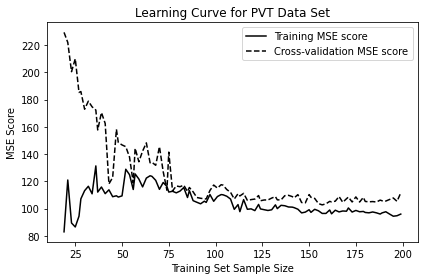

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
dataset=pd.read_csv('PVT Data.csv')
X=dataset.iloc[:,0:4]
y=dataset.iloc[:,4].values
sc=MinMaxScaler()
Xnorm=pd.DataFrame(data=sc.fit_transform(X))
seed=50
np.random.seed(seed)
clfB = MLPRegressor(activation='relu',alpha=0.01, hidden_layer_sizes=7, learning_rate_init=0.01,
             max_iter=500, solver='lbfgs',random_state=20)
train_sample_sizes, train_MSEscores,test_MSEscores =learning_curve(clfB,Xnorm,y,cv=5,scoring='neg_mean_absolute_error',
                                                      n_jobs=-1,train_sizes=np.linspace(0.1,1.0,100),random_state=10)
train_MSEmean = np.mean(train_MSEscores, axis=1)
test_MSEmean = np.mean(test_MSEscores, axis=1)
plt.plot(train_sample_sizes, -train_MSEmean,  color="k",  label="Training MSE score")
plt.plot(train_sample_sizes, -test_MSEmean,'--', color="k", label="Cross-validation MSE score")
plt.title("Learning Curve for PVT Data Set")
plt.xlabel("Training Set Sample Size"), plt.ylabel("MSE Score"),
plt.legend(loc="best")
plt.tight_layout() 
plt.show()